# Country Analysis
    1. Explanitory variables
        1. Population 
        https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population
        1. Internet Prevelance (make sure to divide by population)
        https://en.wikipedia.org/wiki/List_of_countries_by_number_of_Internet_users
        1. Net Migration Rate
        https://en.wikipedia.org/wiki/List_of_countries_by_net_migration_rate
        1. Pop in poverty
        https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty
        1. Employment Rate
        https://en.wikipedia.org/wiki/List_of_sovereign_states_by_employment_rate
        1. Literacy rate
        https://en.wikipedia.org/wiki/List_of_countries_by_literacy_rate
        
    1. Some less regular variables
        1. Wine production https://en.wikipedia.org/wiki/List_of_wine-producing_regions#Countries
    
    1. Target variable
        1. Unemployment https://en.wikipedia.org/wiki/List_of_sovereign_states_by_unemployment_rate
        
    1. Plot unemployment vs homelesness
    https://en.wikipedia.org/wiki/List_of_sovereign_states_by_homeless_population
    
    1. How is unemployment measured??
    https://ilostat.ilo.org/resources/concepts-and-definitions/description-work-statistics-icls19/
    
    1. How is unemployment calculated?
    https://ilostat.ilo.org/resources/concepts-and-definitions/description-work-statistics-icls19/#elementor-toc__heading-anchor-4

# Import libraries

In [100]:
import pandas as pd 
from matplotlib import pyplot as plt
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import linear_model

In [2]:
#tableIndex-number of the table in wiki
def get_table(url,tableIndex):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    # find all table elements on the page with class name "wikitable"
    tables = soup.find_all("table", {"class": "wikitable"})
    second_table = tables[tableIndex]
    # read the table data into a pandas dataframe
    df = pd.read_html(str(second_table))[0]

    return df



# Population

In [3]:
df_population=get_table('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population',0)

In [4]:
df_population

Rank                 Country / Dependency  Population                 \
    Rank                 Country / Dependency     Numbers % of the world   
0      –                                World  8026043000           100%   
1      1                                China  1411750000            NaN   
2      2                                India  1392329000            NaN   
3      3                        United States   334627000            NaN   
4      4                            Indonesia   275773800            NaN   
..   ...                                  ...         ...            ...   
237    –                Tokelau (New Zealand)        1647            NaN   
238    –                                 Niue        1549            NaN   
239  195                         Vatican City         825            NaN   
240    –  Cocos (Keeling) Islands (Australia)         593            NaN   
241    –    Pitcairn Islands (United Kingdom)          47            NaN   

            Date Source (official or from the United Nations) Notes  
            Date Source (official or from the United Nations) Notes  
0    15 Apr 2023                             UN projection[3]   NaN  
1    31 Dec 2022                         Official estimate[4]   [b]  
2     1 Mar 2023                       Official projection[5]   [c]  
3    15 Apr 2023                 National population clock[6]   [d]  
4     1 Jul 2022                         Official estimate[7]   NaN  
..           ...                                          ...   ...  
237   1 Jan 2019                            2019 Census [205]   NaN  
238   1 Jul 2021               National annual projection[94]   NaN  
239   1 Feb 2019               Monthly national estimate[206]  [ag]  
240  30 Jun 2020                             2021 Census[207]   NaN  
241   1 Jul 2021                       Official estimate[208]   NaN  

[242 rows x 7 columns]

In [5]:
df_population.columns= df_population.columns.map('_'.join)

In [6]:
df_population.columns

Index(['Rank_Rank', 'Country / Dependency_Country / Dependency',
       'Population_Numbers', 'Population_% of the world', 'Date_Date',
       'Source (official or from the United Nations)_Source (official or from the United Nations)',
       'Notes_Notes'],
      dtype='object')

In [7]:
df_population=df_population[['Rank_Rank', 'Country / Dependency_Country / Dependency',
       'Population_Numbers']]

In [8]:
df_population.columns=['Rank','Country','Population']

In [9]:
df_population.head()

,Rank,Country,Population
0,–,World,8026043000
1,1,China,1411750000
2,2,India,1392329000
3,3,United States,334627000
4,4,Indonesia,275773800


# Unemployeement

In [10]:
df_unemployeement=pd.read_csv('data/UnemployeementRate.csv')

In [11]:
df_unemployeement.tail(15)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
251,United States,USA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.370000,6.170000,5.280000,4.870000,4.360000,3.900000,3.670000,8.050000,5.350000,NaN
252,Uzbekistan,UZB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.860000,5.090000,5.150000,5.160000,5.830000,5.856000,5.861000,5.290000,6.017000,NaN
253,St. Vincent and the Grenadines,VCT,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.905001,18.948000,18.969000,18.978001,19.028000,19.020000,19.090000,20.549999,20.398001,NaN
254,"Venezuela, RB",VEN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.540000,6.865000,6.077000,5.320000,5.050000,5.020000,5.092000,7.530000,6.471000,NaN
255,British Virgin Islands,VGB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Virgin Islands (U.S.),VIR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,12.402000,12.475000,12.258000,12.354000,12.053000,12.245000,12.350000,13.255000,13.173000,NaN
257,Vietnam,VNM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320000,1.260000,1.850000,1.850000,1.870000,1.160000,1.680000,2.100000,2.380000,NaN
258,Vanuatu,VUT,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.859000,1.792000,1.855000,1.749000,1.710000,1.784000,1.757000,2.017000,2.118000,NaN
259,World,WLD,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.116371,5.981448,6.010948,6.003247,5.873657,5.699077,5.543164,6.898265,6.201812,NaN
260,Samoa,WSM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.661000,8.720000,8.763000,8.819000,9.400000,9.472000,9.147000,9.793000,9.910000,NaN


In [12]:
df_unemployment_wiki=get_table('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_unemployment_rate',0)

In [13]:
df_unemployment_wiki[['Country','waste']]=df_unemployment_wiki.Country.str.split('*',expand=True)

In [14]:
df_unemployment_wiki

,Country,Unemploymentrate (%),Source/date ofinformation,waste
0,Afghanistan,13.3,[4] 2021,
1,Albania,11.7,[5] Q1 2022,
2,Algeria,12.7,[4] 2021,
3,American Samoa,18.0,[6] 2012,
4,Andorra,3.7,[7] 2016,
...,...,...,...,...
218,U.S. Virgin Islands,13.3,[4] 2021,
219,Wallis and Futuna,8.8,[7] 2013,
220,Yemen,13.6,[4] 2021,
221,Zambia,13.0,[4] 2021,


# Country codes

In [15]:
df_countryCodes=get_table('https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes',0)

In [16]:
df_countryCodes.columns= df_countryCodes.columns.map('_'.join)

In [17]:
df_countryCodes=df_countryCodes[['ISO 3166[1]_Country name[5]','ISO 3166-1[2]_Alpha-3 code[5]']]

In [18]:
df_countryCodes.columns=['CountryName','CountryCode']

# Population VS Unemployeement

In [19]:
df_population_vs_unemploy=pd.merge(df_unemployeement, df_population, left_on='Country Name', right_on='Country', how='inner')

In [20]:
df_population_vs_unemploy['%of world population']=df_population_vs_unemploy['Population']/8025126000

In [21]:
df_population_vs_unemploy=df_population_vs_unemploy.drop(labels=163,axis=0)

<AxesSubplot:xlabel='Population', ylabel='2021'>

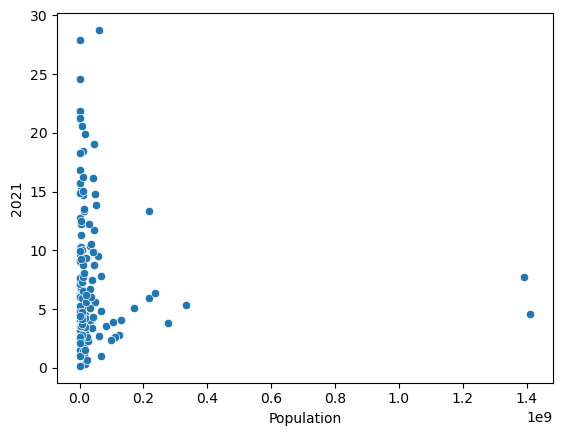

In [22]:
sns.scatterplot(x='Population',y='2021',data=df_population_vs_unemploy)

# Internet users

In [23]:
# example usage: extract the second table from "List of countries by number of Internet users" page
df_internetUsers = get_table("https://en.wikipedia.org/wiki/List_of_countries_by_number_of_Internet_users",2)

In [24]:
df_internetUsers.columns

Index(['Country or area', 'Subregion', 'Region', 'Internet users', 'Pct',
       'Population.mw-parser-output .nobold{font-weight:normal}(2021)[10][11]',
       'Sources', 'Year'],
      dtype='object')

In [25]:
df_internetUsers=df_internetUsers[['Country or area', 'Subregion', 'Region', 'Internet users', 'Year']]

In [26]:
df_internetUsers.head()

,Country or area,Subregion,Region,Internet users,Year
0,China,Eastern Asia,Asia,1051140000,2021
1,India,Southern Asia,Asia,836860000,2022
2,United States,Northern America,Americas,307200000,2022
3,Indonesia,South-eastern Asia,Asia,196000000,2020
4,Brazil,South America,Americas,165300000,2022


# internetUsers vs Unemployment

In [27]:
df_internetUsers=pd.merge(df_internetUsers, df_population, left_on='Country or area', right_on='Country', how='inner')

In [28]:
df_internetUsers['%of internetusers']=df_internetUsers['Internet users']/df_internetUsers['Population']

In [29]:
df_internet_vs_umemployeement=pd.merge(df_internetUsers, df_unemployeement, left_on='Country or area', right_on='Country Name', how='inner')

In [30]:
df_internet_vs_umemployeement

,Country or area,Subregion,Region,Internet users,Year,Rank,Country,Population,%of internetusers,Country Name,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,China,Eastern Asia,Asia,1051140000,2021,1,China,1411750000,0.744565,China,...,4.600,4.630,4.650,4.560,4.470,4.31,4.56,5.000,4.550,NaN
1,India,Southern Asia,Asia,836860000,2022,2,India,1392329000,0.601050,India,...,8.037,7.981,7.915,7.842,7.733,7.65,6.51,10.195,7.713,NaN
2,United States,Northern America,Americas,307200000,2022,3,United States,334627000,0.918037,United States,...,7.370,6.170,5.280,4.870,4.360,3.90,3.67,8.050,5.350,NaN
3,Indonesia,South-eastern Asia,Asia,196000000,2020,4,Indonesia,275773800,0.710727,Indonesia,...,4.340,4.050,4.510,4.300,3.780,4.39,3.59,4.250,3.830,NaN
4,Brazil,South America,Americas,165300000,2022,7,Brazil,216020406,0.765205,Brazil,...,7.070,6.760,8.560,11.740,12.930,12.46,12.05,13.930,13.340,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Marshall Islands,Micronesia,Oceania,20560,2021,189,Marshall Islands,39262,0.523662,Marshall Islands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,San Marino,Southern Europe,Europe,20100,2021,191,San Marino,33785,0.594939,San Marino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,Kiribati,Micronesia,Oceania,16971,2021,179,Kiribati,120740,0.140558,Kiribati,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,Nauru,Micronesia,Oceania,6475,2021,193,Nauru,11832,0.547245,Nauru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='%of internetusers', ylabel='2021'>

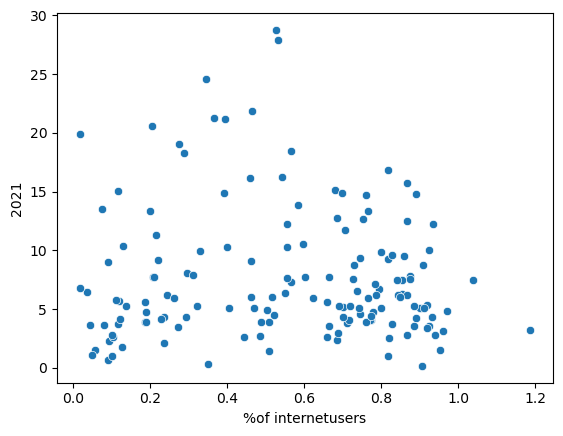

In [31]:
sns.scatterplot(x='%of internetusers',y='2021',data=df_internet_vs_umemployeement)

# Migration

In [32]:
df_migration=get_table('https://en.wikipedia.org/wiki/List_of_countries_by_net_migration_rate',3)

In [33]:
df_migration

,Country,"Migrants per1,000 population"
0,South Sudan,21.1
1,British Virgin Islands,13.6
2,Luxembourg,12.0
3,Cayman Islands (UK),12.6
4,Qatar,2.5
...,...,...
215,Puerto Rico (US),−11.9
216,Tonga,−18.0
217,Lebanon,−0.1
218,"Micronesia, Federated States of",−20.9


# Migration VS unemployment

<AxesSubplot:xlabel='Migrants per1,000 population', ylabel='2019'>

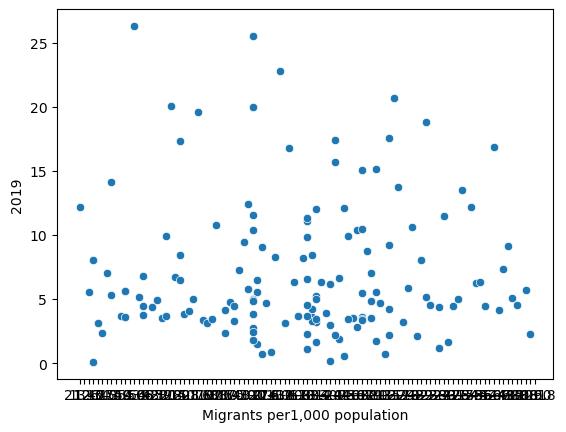

In [34]:
df_migration_vs_umemployeement=pd.merge(df_migration, df_unemployeement, left_on='Country', right_on='Country Name', how='inner')

sns.scatterplot(x='Migrants per1,000 population',y='2019',data=df_migration_vs_umemployeement)

# Poverty

In [35]:
df_poverty=get_table('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty',0)

In [36]:
df_poverty

,Country,< $1.90[1][5],< $3.20[6],< $5.50[7],Year,Continent,Unnamed: 6
0,Albania,10.00%,26.60%,38.40%,2019,Europe,NaN
1,Algeria,0.32%,2.23%,20.83%,2019,Africa,NaN
2,Angola,51.40%,72.79%,89.13%,2019,Africa,NaN
3,Argentina,1.60%,5.80%,18.20%,2020,South America,NaN
4,Armenia,0.40%,6.90%,44.70%,2020,Asia,NaN
...,...,...,...,...,...,...,...
161,Venezuela,6.70%,14.30%,32.70%,2006,South America,NaN
162,Vietnam,1.35%,5.69%,19.87%,2019,Asia,NaN
163,Yemen,54.69%,81.99%,94.55%,2019,Asia,NaN
164,Zambia,58.52%,75.21%,87.95%,2019,Africa,NaN


# Poverty vs Unemployment

<AxesSubplot:xlabel='< $1.90[1][5]', ylabel='2019'>

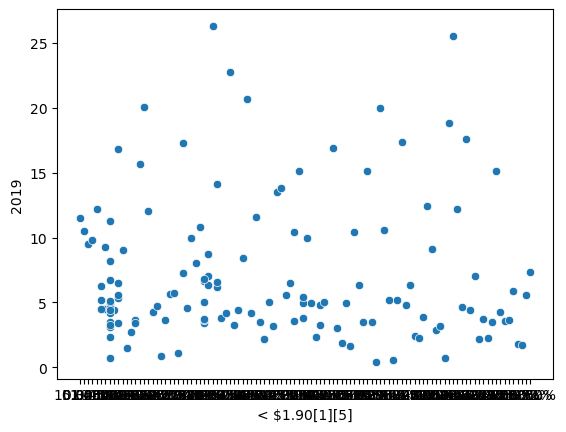

In [37]:
df_migration_vs_umemployeement=pd.merge(df_poverty, df_unemployeement, left_on='Country', right_on='Country Name', how='inner')

sns.scatterplot(x='< $1.90[1][5]',y='2019',data=df_migration_vs_umemployeement)

# Below PovertyLine

In [38]:
#Percent of population living below national poverty line
df_belowPovertyLine=get_table('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty',1)

In [39]:
df_belowPovertyLine

,Country,WorldBank[9],Year,CIA[10],Year.1,Other,Year.2,Continent
0,Afghanistan,54.5%,2016,54.5%,2017,—,—,Asia
1,Albania,21.8%,2019,14.3%,2012,—,—,Europe
2,Algeria,5.5%,2011,5.5%,2011,—,—,Africa
3,Angola,32.3%,2018,32.3%,2018,—,—,Africa
4,Anguilla,—,—,23.0%,2002,—,—,North America
...,...,...,...,...,...,...,...,...
179,Vietnam,6.7%,2018,6.7%,2018,—,—,Asia
180,"Virgin Islands, U.S.",—,—,28.9%,2002,—,—,North America
181,Yemen,48.6%,2014,48.6%,2014,—,—,Asia
182,Zambia,54.4%,2015,54.4%,2015,—,—,Africa


# literacyRate

In [40]:
df_literacyRate=get_table('https://en.wikipedia.org/wiki/List_of_countries_by_literacy_rate',0)

In [41]:
df_literacyRate

Country Youth(15 to 24)         Adult(25+)          \
               Country            Rate    Year       Rate    Year   
0        Afghanistan *            47.0  2011.0       31.7  2011.0   
1            Albania *            99.2  2012.0       97.2  2012.0   
2            Algeria *            93.8  2008.0       75.1  2008.0   
3     American Samoa *            97.7  1980.0       97.3  1980.0   
4            Andorra *             NaN     NaN        NaN     NaN   
..                 ...             ...     ...        ...     ...   
229  Wallis and Futuna             NaN     NaN        NaN     NaN   
230     Western Sahara             NaN     NaN        NaN     NaN   
231            Yemen *            77.0  2004.0       54.1  2004.0   
232           Zambia *            88.7  2010.0       83.0  2010.0   
233         Zimbabwe *            90.4  2014.0       88.7  2014.0   

    Elderly(65+)         Youth GenderParity Index          
            Rate    Year                     Rate    Year  
0           20.3  2011.0                      0.5  2011.0  
1           86.9  2012.0                      1.0  2012.0  
2           19.5  2008.0                      1.0  2008.0  
3           92.7  1980.0                      1.0  1980.0  
4            NaN     NaN                      NaN     NaN  
..           ...     ...                      ...     ...  
229          NaN     NaN                      NaN     NaN  
230          NaN     NaN                      NaN     NaN  
231         13.7  2004.0                      0.7  2004.0  
232         52.3  2010.0                      0.9  2010.0  
233         81.1  2014.0                      1.1  2014.0  

[234 rows x 9 columns]

In [42]:
df_literacyRate.columns= df_literacyRate.columns.map('_'.join)

In [43]:
df_literacyRate

,Country_Country,Youth(15 to 24)_Rate,Youth(15 to 24)_Year,Adult(25+)_Rate,Adult(25+)_Year,Elderly(65+)_Rate,Elderly(65+)_Year,Youth GenderParity Index_Rate,Youth GenderParity Index_Year
0,Afghanistan *,47.0,2011.0,31.7,2011.0,20.3,2011.0,0.5,2011.0
1,Albania *,99.2,2012.0,97.2,2012.0,86.9,2012.0,1.0,2012.0
2,Algeria *,93.8,2008.0,75.1,2008.0,19.5,2008.0,1.0,2008.0
3,American Samoa *,97.7,1980.0,97.3,1980.0,92.7,1980.0,1.0,1980.0
4,Andorra *,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,Yemen *,77.0,2004.0,54.1,2004.0,13.7,2004.0,0.7,2004.0
232,Zambia *,88.7,2010.0,83.0,2010.0,52.3,2010.0,0.9,2010.0


In [44]:
df_literacyRate[['Country_Country','waste']]=df_literacyRate.Country_Country.str.split('*',expand=True)

In [45]:
df_literacyRate.Country_Country=df_literacyRate.Country_Country.str.strip()

# literacyRate VS Unemployment

<AxesSubplot:xlabel='Adult(25+)_Rate', ylabel='2019'>

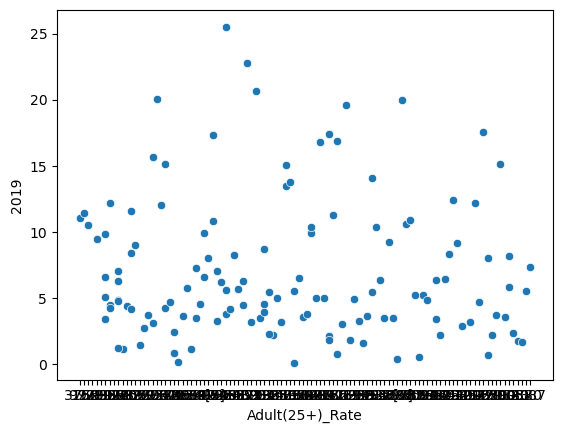

In [46]:
df_migration_vs_umemployeement=pd.merge(df_literacyRate, df_unemployeement, left_on='Country_Country', right_on='Country Name', how='inner')

sns.scatterplot(x='Adult(25+)_Rate',y='2019',data=df_migration_vs_umemployeement)

# Wine production

In [47]:
df_wineProduce=get_table('https://en.wikipedia.org/wiki/List_of_wine-producing_regions#Countries',0)

In [48]:
df_wineProduce

,Rank,Country(with link to wine article),Production(tonnes)
0,1,Italy,4796900
1,2,Spain,4607850
2,3,France,4293466
3,4,United States,3300000
4,5,China,1700000
...,...,...,...
68,69,Tajikistan,150
69,70,Liechtenstein,79
70,71,Syria,70
71,72,Poland,49


# Wine vs Unemployment

In [49]:
df_wine_vs_unemployeement=pd.merge(df_wineProduce,df_unemployeement,left_on='Country(with link to wine article)',right_on='Country Name',how='left')

In [50]:
df_wine_vs_unemployeement

,Rank,Country(with link to wine article),Production(tonnes),Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,1,Italy,4796900,Italy,ITA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,...,12.150,12.680000,11.900000,11.690000,11.210000,10.610,9.950,9.160,9.500,NaN
1,2,Spain,4607850,Spain,ESP,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,...,26.090,24.440001,22.059999,19.639999,17.219999,15.250,14.100,15.530,14.780,NaN
2,3,France,4293466,France,FRA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,...,9.920,10.290000,10.350000,10.050000,9.410000,9.020,8.410,8.010,7.860,NaN
3,4,United States,3300000,United States,USA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,...,7.370,6.170000,5.280000,4.870000,4.360000,3.900,3.670,8.050,5.350,NaN
4,5,China,1700000,China,CHN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,...,4.600,4.630000,4.650000,4.560000,4.470000,4.310,4.560,5.000,4.550,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,Tajikistan,150,Tajikistan,TJK,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,...,8.904,8.227000,7.552000,6.900000,6.949000,7.001,7.044,7.485,7.744,NaN
69,70,Liechtenstein,79,Liechtenstein,LIE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,71,Syria,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,72,Poland,49,Poland,POL,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,...,10.330,8.990000,7.500000,6.160000,4.890000,3.850,3.280,3.160,3.360,NaN


<AxesSubplot:xlabel='Production(tonnes)', ylabel='2021'>

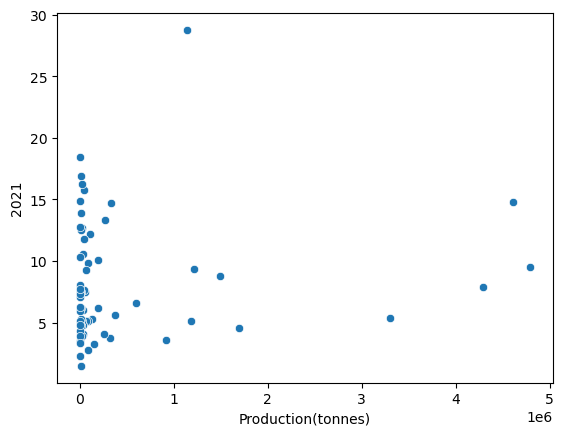

In [51]:
sns.scatterplot(x='Production(tonnes)',y='2021',data=df_wine_vs_unemployeement)

# vehicles_per_capita

In [52]:
df_vehicles=get_table('https://en.wikipedia.org/wiki/List_of_countries_by_vehicles_per_capita',0)

In [53]:
df_vehicles

,Country or region,"Motor vehiclesper 1,000 people",Total,Year
0,Gibraltar,1444,48641,2022[1]
1,Guernsey,1365,86000,2014[2]
2,San Marino,1300,44200,2022[3]
3,Liechtenstein,1193,45800,2022[4]
4,Andorra,1050,81000,2021[5]
...,...,...,...,...
191,Somalia,5,80000,2017[200]
192,Sudan,4,181000,2019[201][202]
193,Republic of the Congo,4,22540,2020[203]
194,Central African Republic,4,19300,2019[83][204]


In [54]:
df_vehi_vs_unemployeement=pd.merge(df_vehicles,df_unemployeement,left_on='Country or region',right_on='Country Name',how='left')

df_vehi_vs_unemployeement


,Country or region,"Motor vehiclesper 1,000 people",Total,Year,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Gibraltar,1444,48641,2022[1],Gibraltar,GIB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Guernsey,1365,86000,2014[2],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,San Marino,1300,44200,2022[3],San Marino,SMR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Liechtenstein,1193,45800,2022[4],Liechtenstein,LIE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,1050,81000,2021[5],Andorra,AND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Somalia,5,80000,2017[200],Somalia,SOM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,19.066000,19.010,18.877001,18.931,18.975000,18.870001,18.827999,19.566999,19.931000,NaN
192,Sudan,4,181000,2019[201][202],Sudan,SDN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,17.405001,17.385,17.444000,17.441,17.500999,17.572001,17.586000,19.292000,19.049999,NaN
193,Republic of the Congo,4,22540,2020[203],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Central African Republic,4,19300,2019[83][204],Central African Republic,CAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,5.452000,5.577,5.737000,5.746,5.762000,5.700000,5.755000,6.380000,6.458000,NaN


<AxesSubplot:xlabel='Motor vehiclesper 1,000 people', ylabel='2021'>

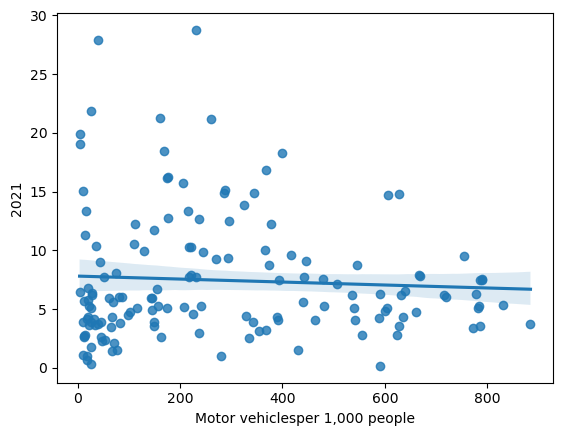

In [55]:
sns.regplot(x='Motor vehiclesper 1,000 people',y='2021',data=df_vehi_vs_unemployeement)

In [56]:
df_GDP=get_table('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita',0)

In [57]:
df_GDP['Country/Territory']['Country/Territory']

0                NaN
1             Monaco
2      Liechtenstein
3         Luxembourg
4            Ireland
           ...      
219           Malawi
220      South Sudan
221     Sierra Leone
222      Afghanistan
223          Burundi
Name: Country/Territory, Length: 224, dtype: object

In [58]:
df_GDP.columns= df_GDP.columns.map('_'.join)

In [59]:
df_GDP

,Country/Territory_Country/Territory,UN Region_UN Region,IMF[4][5]_Estimate,IMF[4][5]_Year,World Bank[6]_Estimate,World Bank[6]_Year,United Nations[7]_Estimate,United Nations[7]_Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monaco,Europe,—,—,234316,2021,234317,2021
2,Liechtenstein,Europe,—,—,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
...,...,...,...,...,...,...,...,...
219,Malawi,Africa,496,2023,635,2021,613,2021
220,South Sudan,Africa,467,2023,1072,2015,400,2021
221,Sierra Leone,Africa,415,2023,480,2021,505,2021
222,Afghanistan,Asia,611,2020,369,2021,373,2021


In [60]:
df_GDP_vs_unemployeement=pd.merge(df_GDP,df_unemployeement,left_on='Country/Territory_Country/Territory',right_on='Country Name',how='left')

In [61]:
df_GDP_vs_unemployeement

,Country/Territory_Country/Territory,UN Region_UN Region,IMF[4][5]_Estimate,IMF[4][5]_Year,World Bank[6]_Estimate,World Bank[6]_Year,United Nations[7]_Estimate,United Nations[7]_Year,Country Name,Country Code,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monaco,Europe,—,—,234316,2021,234317,2021,Monaco,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Liechtenstein,Europe,—,—,157755,2020,169260,2021,Liechtenstein,LIE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021,Luxembourg,LUX,...,5.850,5.850,6.670,6.290,5.520,5.590,5.590,6.770,5.250,NaN
4,Ireland,Europe,114581,2023,100172,2021,101109,2021,Ireland,IRL,...,13.730,11.860,9.910,8.370,6.710,5.740,4.950,5.620,6.190,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Malawi,Africa,496,2023,635,2021,613,2021,Malawi,MWI,...,4.980,4.968,4.987,4.982,4.960,4.949,4.932,5.681,5.658,NaN
220,South Sudan,Africa,467,2023,1072,2015,400,2021,South Sudan,SSD,...,12.036,12.139,12.290,12.326,12.260,12.229,12.199,13.745,13.485,NaN
221,Sierra Leone,Africa,415,2023,480,2021,505,2021,Sierra Leone,SLE,...,4.469,4.680,4.437,3.927,3.561,3.190,3.193,3.572,3.697,NaN
222,Afghanistan,Asia,611,2020,369,2021,373,2021,Afghanistan,AFG,...,7.949,7.910,8.989,10.086,11.180,11.110,11.085,11.710,NaN,NaN


<AxesSubplot:xlabel='World Bank[6]_Estimate', ylabel='2021'>

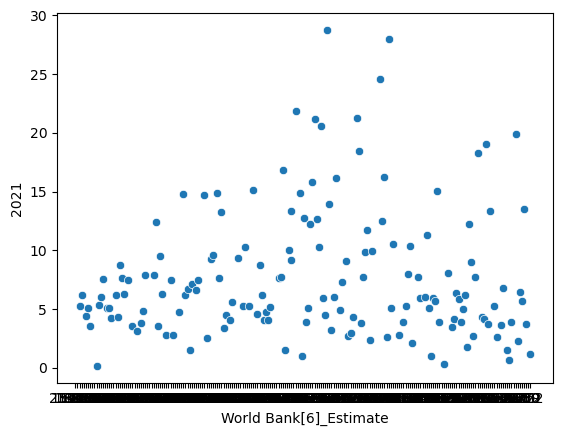

In [62]:
sns.scatterplot(x='World Bank[6]_Estimate',y='2021',data=df_GDP_vs_unemployeement)

In [63]:
df_combine[df_combine['Country Name']=='India']

NameError: name 'df_combine' is not defined

In [ ]:
df_combine=df_combine.drop(labels=[40,109], axis=0)

In [ ]:
sns.regplot(x='Population_Numbers',y='2021',data=df_combine)

In [64]:
df_IrrigatedLand=get_table('https://en.wikipedia.org/wiki/List_of_countries_by_irrigated_land_area',0)

In [65]:
df_IrrigatedLand=df_IrrigatedLand.sort_values('Country/region')

In [66]:
df_IrrigatedLand

,Rank,Country/region,Irrigated land (km2),Date of information
19,19,Afghanistan,32080.0,2012.0
67,65,Albania,3310.0,2012.0
53,52,Algeria,5700.0,2012.0
181,—,American Samoa,0.0,2012.0
182,144,Andorra,0.0,2012.0
...,...,...,...,...
218,—,Western Sahara,0.0,2012.0
236,—,World,3242917.0,2012.0
52,50,Yemen,6800.0,2012.0
82,80,Zambia,1560.0,2012.0


In [67]:
df_unemployeement

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.512784,6.555645,6.707142,6.855589,6.940365,6.913046,7.121664,7.631303,7.920219,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.949000,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.804448,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.834000,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.264000,13.470000,13.783000,13.407000,13.250000,13.076000,12.978000,13.575000,13.887000,NaN
263,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.040001,22.610001,22.870001,24.020000,23.990000,24.219999,25.540001,24.340000,28.770000,NaN
264,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.005000,8.133000,8.280000,8.393000,8.520000,5.030000,5.540000,6.030000,6.220000,NaN


In [68]:
df_irr_vs_Unempl=pd.merge(df_IrrigatedLand,df_unemployeement,left_on='Country/region',right_on='Country Name',how='inner')

In [69]:
df_irr_vs_Unempl

,Rank,Country/region,Irrigated land (km2),Date of information,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,19,Afghanistan,32080.0,2012.0,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,7.949000,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN,NaN
1,65,Albania,3310.0,2012.0,Albania,ALB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,15.870000,18.049999,17.190001,15.420000,13.620000,12.300000,11.470000,13.067000,12.683000,NaN
2,52,Algeria,5700.0,2012.0,Algeria,DZA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,9.820000,10.210000,11.210000,10.200000,10.334000,10.416000,10.495000,12.248000,11.747000,NaN
3,—,American Samoa,0.0,2012.0,American Samoa,ASM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144,Andorra,0.0,2012.0,Andorra,AND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,144,Vanuatu,0.0,2012.0,Vanuatu,VUT,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,1.859000,1.792000,1.855000,1.749000,1.710000,1.784000,1.757000,2.017000,2.118000,NaN
179,12,Vietnam,46000.0,2012.0,Vietnam,VNM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,1.320000,1.260000,1.850000,1.850000,1.870000,1.160000,1.680000,2.100000,2.380000,NaN
180,—,World,3242917.0,2012.0,World,WLD,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,6.116371,5.981448,6.010948,6.003247,5.873657,5.699077,5.543164,6.898265,6.201812,NaN
181,80,Zambia,1560.0,2012.0,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,...,8.005000,8.133000,8.280000,8.393000,8.520000,5.030000,5.540000,6.030000,6.220000,NaN


<AxesSubplot:xlabel='Irrigated land (km2)', ylabel='2020'>

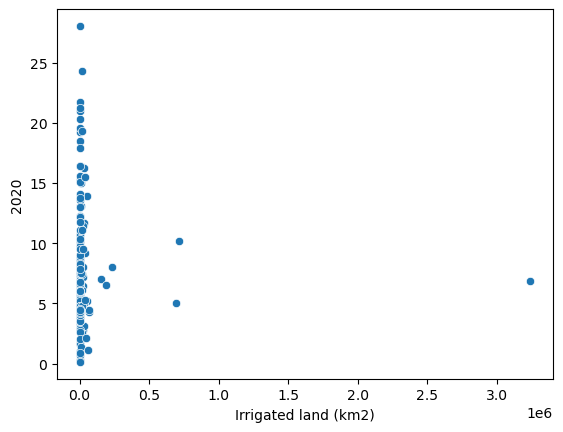

In [70]:
sns.scatterplot(x='Irrigated land (km2)',y='2020',data=df_irr_vs_Unempl)

# Economic Model Explainations

### Walrasian Model, simplified to be univariable (real minimum wage)

[-0.16237268] 0.08641052509571778


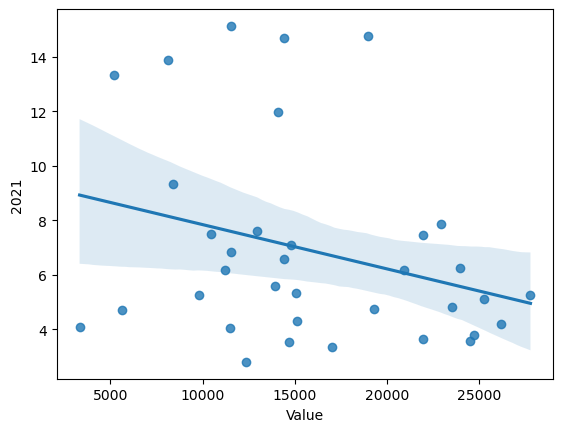

In [109]:
df_minWage = pd.read_csv('data/realMinWage.csv')
df_minWage = df_minWage.query('Time == 2021 and SERIES.str.startswith("PPP") and PERIOD.str.startswith("A") ')

df_minWage_vs_Unempl=pd.merge(df_minWage,df_unemployeement,left_on='COUNTRY',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2021',data=df_minWage_vs_Unempl)

X = df_minWage_vs_Unempl[['Value']]
Y = df_minWage_vs_Unempl['2021']
lm = linear_model.LinearRegression()
lm.fit(X,Y)
print(lm.coef_*1000,lm.score(X,Y))

At least we got a negative slope as expected by the model. Not supported well at all though

## Let's try some other factors

In [110]:
df_all = pd.read_csv('data/everything.csv')

C:\Users\Jacob\AppData\Local\Temp\ipykernel_19584\2945327670.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('data/everything.csv')


### What percent of the employed population is employed in the service sector

[0.06280487] 0.017517896380651043


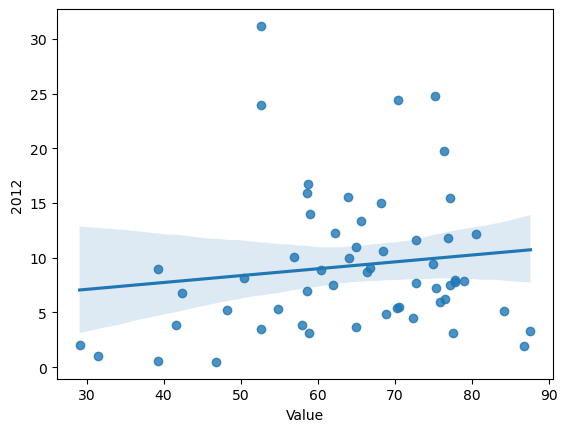

In [126]:
df_service = df_all.query('Variable.str.startswith("Total employment in service sector") and Sex.str.startswith("T") and TIME == 2012')
df_service_vs_Unempl=pd.merge(df_service,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2012',data=df_service_vs_Unempl)

X = df_service_vs_Unempl[['Value']]
Y = df_service_vs_Unempl['2012']
lm = linear_model.LinearRegression()
lm.fit(X,Y)
print(lm.coef_,lm.score(X,Y))

[0.17287678] 0.11755597594837341


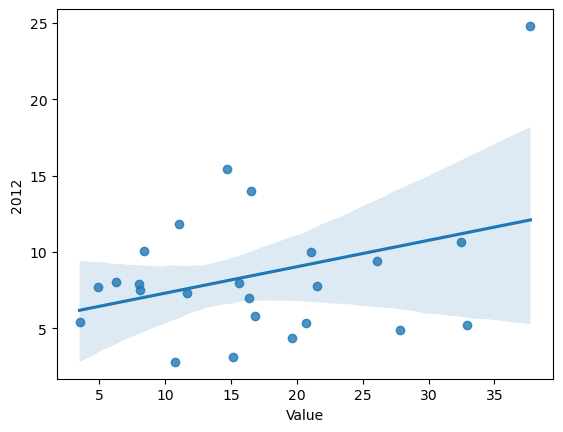

In [140]:
df_low = df_all.query('Variable.str.startswith("Job requirements; low qualification") and Sex.str.startswith("T")')
df_low_vs_Unempl=pd.merge(df_low,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2012',data=df_low_vs_Unempl)

X = df_low_vs_Unempl[['Value']]
Y = df_low_vs_Unempl['2012']
lm = linear_model.LinearRegression()
lm.fit(X,Y)
print(lm.coef_,lm.score(X,Y))

[-0.11233564] 0.07191704341701288


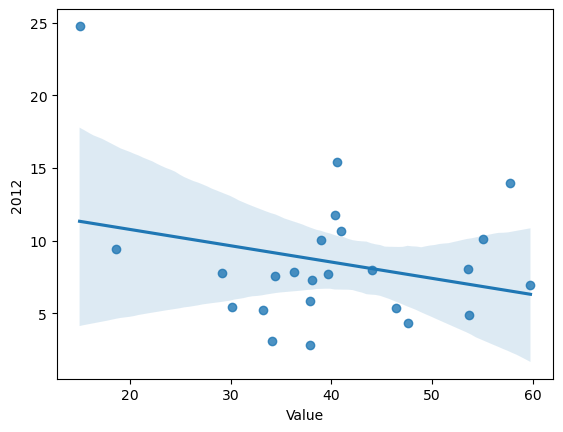

In [215]:
df_med = df_all.query('Variable.str.startswith("Job requirements; medium qualification") and Sex.str.startswith("T")')
df_med_vs_Unempl=pd.merge(df_med,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2012',data=df_med_vs_Unempl)

X = df_med_vs_Unempl[['Value']]
Y = df_med_vs_Unempl['2012']
lm = linear_model.LinearRegression()
lm.fit(X,Y)
print(lm.coef_,lm.score(X,Y))

[-0.03805309] 0.00533641078264846


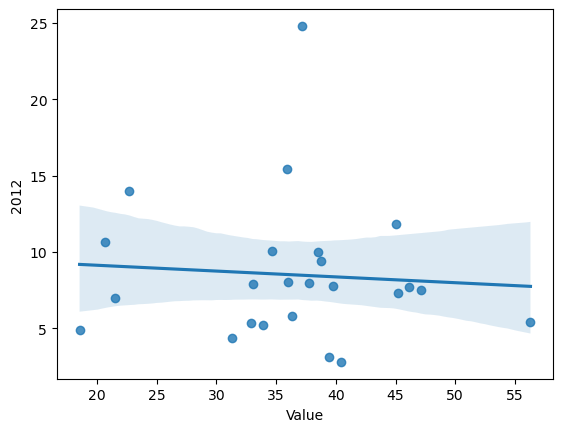

In [139]:
df_high = df_all.query('Variable.str.startswith("Job requirements; high qualification") and Sex.str.startswith("T")')
df_high_vs_Unempl=pd.merge(df_high,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2012',data=df_high_vs_Unempl)

X = df_high_vs_Unempl[['Value']]
Y = df_high_vs_Unempl['2012']
lm = linear_model.LinearRegression()
lm.fit(X,Y)
print(lm.coef_,lm.score(X,Y))

In [247]:
df_high = df_high.rename(columns={"Value": "highSkill"})
df_med = df_med.rename(columns={"Value": "medSkill"})
df_low = df_low.rename(columns={"Value": "lowSkill"})

df_skill = pd.merge(df_high,df_med,left_on='LOCATION',right_on='LOCATION',how='inner')
df_skill = pd.merge(df_skill,df_low,left_on='LOCATION',right_on='LOCATION',how='inner')
df_skill = pd.merge(df_skill,df_minWage,left_on='LOCATION',right_on='COUNTRY',how='inner')
df_skill = pd.merge(df_skill,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')

X = df_skill[['highSkill','medSkill','lowSkill','Value']]
Y = df_skill['2012']
lm = linear_model.LinearRegression()
lm.fit(X,Y)
print(lm.score(X,Y))

0.4012761872792734


C:\Users\Jacob\AppData\Local\Temp\ipykernel_19584\2044054542.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Country_x', 'Reference Period_x', 'TIME_x', 'Flag Codes_x', 'Reference Period Code_x', 'Unit_x', 'Unit Code_x', 'PowerCode_x', 'Flags_x', 'PowerCode Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_skill = pd.merge(df_skill,df_minWage,left_on='LOCATION',right_on='COUNTRY',how='inner')


In [198]:
df_all['Variable'].unique()

array(['Percentage of population that is female',
       'Relative size of youth population',
       'Educational attainment of the adult population; no schooling',
       'Educational attainment of the adult population; primary (ISCED 1)',
       'Educational attainment of the adult population; lower secondary (ISCED 2)',
       'Educational attainment of the adult population; upper secondary (ISCED 3)',
       'Educational attainment of the adult population; post-secondary non-tertiary (ISCED 4)',
       'Educational attainment of the adult population; tertiary (ISCED 5-6)',
       'Gross primary school enrolment rate ',
       'Net primary school enrolment rate ',
       'Gross secondary education enrolment rate ',
       'Net secondary education enrolment rate ',
       'Tertiary level enrolment rate ',
       'Education enrolment rate of young adults ',
       'Share of tertiary graduates in STEM subjects ',
       'Share of tertiary enrolments in STEM subjects ',
       'Educatio